MAESTRÍA EN CIENCIA DE DATOS V4
MATERIA: MINERÍA DE DATOS I
PROYECTO DE MATERIA

El proyecto consiste en la aplicación de las siguientes técnicas:

Naive Bayes
Association Rules
Linear Regression
Logistic Regresion

Lineamientos:

•	Este proyecto se realiza por grupo
•	Se deben presentar cuatro Jupyter Notebooks.
•	Cada notebook debe contar con el proceso EDA correspondiente.
•	Los datasets pueden ser de las instituciones donde trabajan los maestrantes con la debida codificación por cuestiones de pertenencia del dataset, a no ser que sean datos públicos. Como también de otras fuentes como Kaggle.com u otras.

GAUSSIAN NAIVE BAYES CON PCA



In [1]:
#Importar librerías numpy, pandas y seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df_Cleveland = pd.read_csv('Cleveland.csv')
df_Hungarian = pd.read_csv('Hungarian.csv')
df_Switzerland = pd.read_csv('Switzerland.csv')
df_VA = pd.read_csv('VA.csv')
df = df = pd.concat([df_Cleveland, df_Hungarian, df_Switzerland, df_VA], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
print(df.describe().loc[['min','max']],"\n",df.head(5),"\n","\n",sep='\n')

        ID  Edad  Sexo   CP  TRESTBPS   CHOL  FBS  RESTECG  THALACH  EXANG  \
min    0.0  28.0   0.0  1.0       0.0    0.0  0.0      0.0     60.0    0.0   
max  302.0  77.0   1.0  4.0     200.0  603.0  1.0      2.0    202.0    1.0   

     OLDPEAK  SLOPE   CA  THAL  VDD  
min     -2.6    1.0  0.0   3.0  0.0  
max      6.2    3.0  9.0   7.0  1.0  


    ID  Edad  Sexo  CP  TRESTBPS   CHOL  FBS  RESTECG  THALACH  EXANG  \
0   87    51     1   4       NaN  227.0  1.0      1.0      NaN    NaN   
1  113    38     1   2     140.0  297.0  0.0      0.0    150.0    0.0   
2   57    60     1   3       NaN  316.0  1.0      1.0      NaN    NaN   
3   14    42     0   3     115.0  211.0  0.0      1.0    137.0    0.0   
4  125    54     1   2     120.0  246.0  0.0      0.0    110.0    0.0   

   OLDPEAK  SLOPE  CA  THAL  VDD  
0      NaN    NaN NaN   NaN    0  
1      0.0    NaN NaN   NaN    0  
2      NaN    NaN NaN   NaN    1  
3      0.0    NaN NaN   NaN    0  
4      0.0    NaN NaN   NaN    0  


In [12]:
print(df.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        920 non-null    int64  
 1   Edad      920 non-null    int64  
 2   Sexo      920 non-null    int64  
 3   CP        920 non-null    int64  
 4   TRESTBPS  861 non-null    float64
 5   CHOL      890 non-null    float64
 6   FBS       830 non-null    float64
 7   RESTECG   918 non-null    float64
 8   THALACH   865 non-null    float64
 9   EXANG     865 non-null    float64
 10  OLDPEAK   858 non-null    float64
 11  SLOPE     611 non-null    float64
 12  CA        310 non-null    float64
 13  THAL      434 non-null    float64
 14  VDD       920 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 107.9 KB
None


In [15]:
x1 = len(df)
df.duplicated().sum()
if df.duplicated().sum() > 0:
    print('Hay valores duplicados')
    def drop_duplicate(df):
        df.drop_duplicates(inplace=True)
        return df
else:
    print('No hay valores duplicados')
    def drop_duplicate_columns(df):
        df.drop_duplicates(axis=1,inplace=True)
        return df

if df.isnull().sum().sum() > 0:
    print('Hay valores faltantes')
    print(df.isnull().sum()/len(df)*920)
else:
    print('No hay valores faltantes')
x2 = len(df)    
if x1 == x2:
    print('No se han eliminado valores')
    print(x1,'\n',df.head(5),'\n',sep='\n')
else:
    print('Se han eliminado valores: ',x1-x2)
    print(x2,'\n',df.head(5),'\n',sep='\n')

No hay valores duplicados
Hay valores faltantes
ID            0.0
Edad          0.0
Sexo          0.0
CP            0.0
TRESTBPS     59.0
CHOL         30.0
FBS          90.0
RESTECG       2.0
THALACH      55.0
EXANG        55.0
OLDPEAK      62.0
SLOPE       309.0
CA          610.0
THAL        486.0
VDD           0.0
dtype: float64
No se han eliminado valores
920


    ID  Edad  Sexo  CP  TRESTBPS   CHOL  FBS  RESTECG  THALACH  EXANG  \
0   87    51     1   4       NaN  227.0  1.0      1.0      NaN    NaN   
1  113    38     1   2     140.0  297.0  0.0      0.0    150.0    0.0   
2   57    60     1   3       NaN  316.0  1.0      1.0      NaN    NaN   
3   14    42     0   3     115.0  211.0  0.0      1.0    137.0    0.0   
4  125    54     1   2     120.0  246.0  0.0      0.0    110.0    0.0   

   OLDPEAK  SLOPE  CA  THAL  VDD  
0      NaN    NaN NaN   NaN    0  
1      0.0    NaN NaN   NaN    0  
2      NaN    NaN NaN   NaN    1  
3      0.0    NaN NaN   NaN    0  
4      0.0    NaN N

In [21]:
#Reemplazar valores 'NaN' por la media de la columna
for i in df.columns:
    df[i].fillna(df[i].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        920 non-null    int64  
 1   Edad      920 non-null    int64  
 2   Sexo      920 non-null    int64  
 3   CP        920 non-null    int64  
 4   TRESTBPS  920 non-null    float64
 5   CHOL      920 non-null    float64
 6   FBS       920 non-null    float64
 7   RESTECG   920 non-null    float64
 8   THALACH   920 non-null    float64
 9   EXANG     920 non-null    float64
 10  OLDPEAK   920 non-null    float64
 11  SLOPE     920 non-null    float64
 12  CA        920 non-null    float64
 13  THAL      920 non-null    float64
 14  VDD       920 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 107.9 KB


In [23]:
print(df.head(5), df.shape, sep='\n')

    ID  Edad  Sexo  CP    TRESTBPS   CHOL  FBS  RESTECG     THALACH     EXANG  \
0   87    51     1   4  132.132404  227.0  1.0      1.0  137.545665  0.389595   
1  113    38     1   2  140.000000  297.0  0.0      0.0  150.000000  0.000000   
2   57    60     1   3  132.132404  316.0  1.0      1.0  137.545665  0.389595   
3   14    42     0   3  115.000000  211.0  0.0      1.0  137.000000  0.000000   
4  125    54     1   2  120.000000  246.0  0.0      0.0  110.000000  0.000000   

    OLDPEAK     SLOPE        CA      THAL  VDD  
0  0.878788  1.770867  0.703226  5.087558    0  
1  0.000000  1.770867  0.703226  5.087558    0  
2  0.878788  1.770867  0.703226  5.087558    1  
3  0.000000  1.770867  0.703226  5.087558    0  
4  0.000000  1.770867  0.703226  5.087558    0  
(920, 15)


In [24]:
#Obtiene un total de pacientes con o sin una enfermedad cardiovascular del dataset Cleveland
#Valor 0 = Persona saludable
#Valor 1 = Persona con algun tipo de enfermedad cardiovascular.
df['VDD'].value_counts()

1    509
0    411
Name: VDD, dtype: int64

In [25]:
#Sexo del paciente
#Valor 0: femenino
#Valor 1: masculino
df['Sexo'].value_counts()

1    726
0    194
Name: Sexo, dtype: int64

In [26]:
#Tipo de dolor de pecho
#Valor 1: angina típica 
#Valor 2: angina atípica 
#Valor 3: dolor no angina 
#Valor 4: asintomático
df['CP'].value_counts()

4    496
3    204
2    174
1     46
Name: CP, dtype: int64

In [27]:
#Glucemia en ayunas > 120 mg/dl
#Valor 0: falso
#Valor 1: Verdadero
df['FBS'].value_counts()

0.000000    692
1.000000    138
0.166265     90
Name: FBS, dtype: int64

In [28]:
#Resultados electrocardiográficos en reposo
#Valor 0: normal
#Valor 1: Anomalo
#Valor 2: hipertrofia ventricular izquierda probable o definitiva
df['RESTECG'].value_counts()

0.000000    551
2.000000    188
1.000000    179
0.604575      2
Name: RESTECG, dtype: int64

In [29]:
#Angina producida por ejercicio
#Valor 0: Falso
#Valor 1: Verdadero
df['EXANG'].value_counts()

0.000000    528
1.000000    337
0.389595     55
Name: EXANG, dtype: int64

In [30]:
#Pendiente del segmento ST de ejercicio pico
#Valor 1: Ascendente
#Valor 2: Plana
#Valor 3: Descendente
df['SLOPE'].value_counts()

2.000000    345
1.770867    309
1.000000    203
3.000000     63
Name: SLOPE, dtype: int64

In [31]:
#Número de vasos cardíacos principales
df['CA'].value_counts()

0.703226    610
0.000000    181
1.000000     67
2.000000     41
3.000000     20
9.000000      1
Name: CA, dtype: int64

In [32]:
#Resultado de la prueba de esfuerzo con talio
#Valor 3: Normal (Flujo Normal)
#Valor 6: Fijo defectuoso (Sin circulación en algunas partes del corazón)
#Valor 7: Defecto reversible (Se observa circulación pero no es normal)
df['THAL'].value_counts()

5.087558    486
3.000000    196
7.000000    192
6.000000     46
Name: THAL, dtype: int64

In [35]:
#Creación de una columna llamada AÑOS para no interferir con la columna Edad
df['AÑOS']= (df['Edad']).round(0)
df['AÑOS']= pd.to_numeric(df['AÑOS'],downcast='integer')

<Axes: xlabel='AÑOS', ylabel='count'>

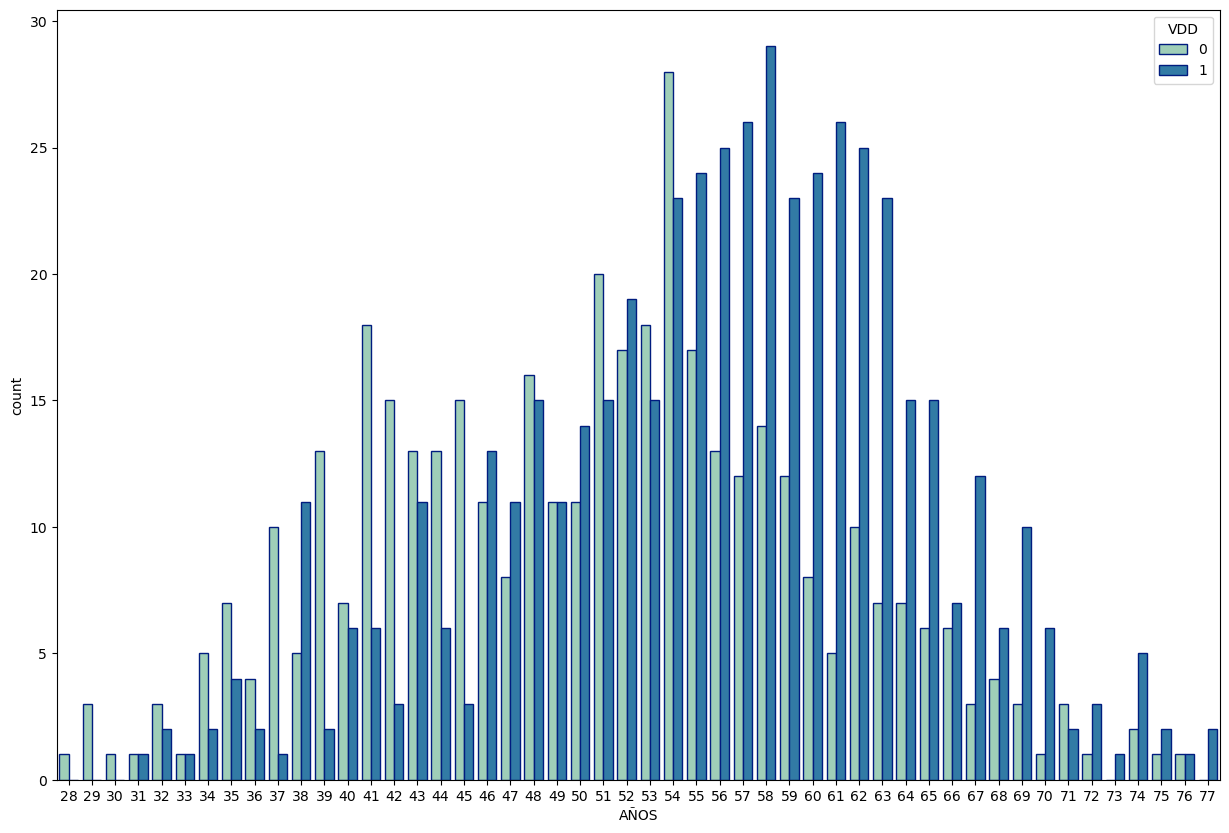

In [37]:
#Para visualizar a las personas con o sin una enfermedad cardiovascular a determinada edad
plt.figure(figsize=(15,10))
sns.countplot(x='AÑOS',hue='VDD',data=df,palette='YlGnBu',edgecolor=sns.color_palette('dark',n_colors=1))

In [39]:
#Drop de las columnas AÑOS (identica a Edad) y la columna ID que no tienen efecto dentro del estudio
df=df.drop('AÑOS',axis=1)

In [40]:
df=df.drop('ID',axis=1)

In [41]:
#Obtiene la correlación entre columnas de dataset de Cleveland
corrC = df.corr()
df.corr()

,Edad,Sexo,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,VDD
Edad,1.000000,0.056889,0.166245,0.235253,-0.084499,0.222810,0.212219,-0.353471,0.194842,0.248082,0.119158,0.171654,0.091507,0.282700
Sexo,0.056889,1.000000,0.170392,0.001073,-0.193782,0.086096,-0.015608,-0.177135,0.179209,0.102733,0.103178,0.030373,0.274681,0.307284
CP,0.166245,0.170392,1.000000,0.024297,-0.130656,0.038223,0.030991,-0.338742,0.406837,0.235681,0.158773,0.128474,0.210838,0.471712
TRESTBPS,0.235253,0.001073,0.024297,1.000000,0.088290,0.135650,0.096591,-0.104616,0.151857,0.160268,0.053894,0.061091,0.072813,0.102922
CHOL,-0.084499,-0.193782,-0.130656,0.088290,1.000000,0.020493,0.114755,0.226325,-0.033110,0.045498,-0.050685,0.013695,-0.121821,-0.226467
FBS,0.222810,0.086096,0.038223,0.135650,0.020493,1.000000,0.128408,-0.048344,0.025402,0.047497,0.067090,0.069925,0.071716,0.136059
RESTECG,0.212219,-0.015608,0.030991,0.096591,0.114755,0.128408,1.000000,0.051980,0.031590,0.115498,-0.012786,0.070178,-0.032077,0.063811
THALACH,-0.353471,-0.177135,-0.338742,-0.104616,0.226325,-0.048344,0.051980,1.000000,-0.356439,-0.149630,-0.299530,-0.136593,-0.241219,-0.382942
EXANG,0.194842,0.179209,0.406837,0.151857,-0.033110,0.025402,0.031590,-0.356439,1.000000,0.390247,0.274861,0.086623,0.240410,0.450034
OLDPEAK,0.248082,0.102733,0.235681,0.160268,0.045498,0.047497,0.115498,-0.149630,0.390247,1.000000,0.363179,0.158998,0.180638,0.372890


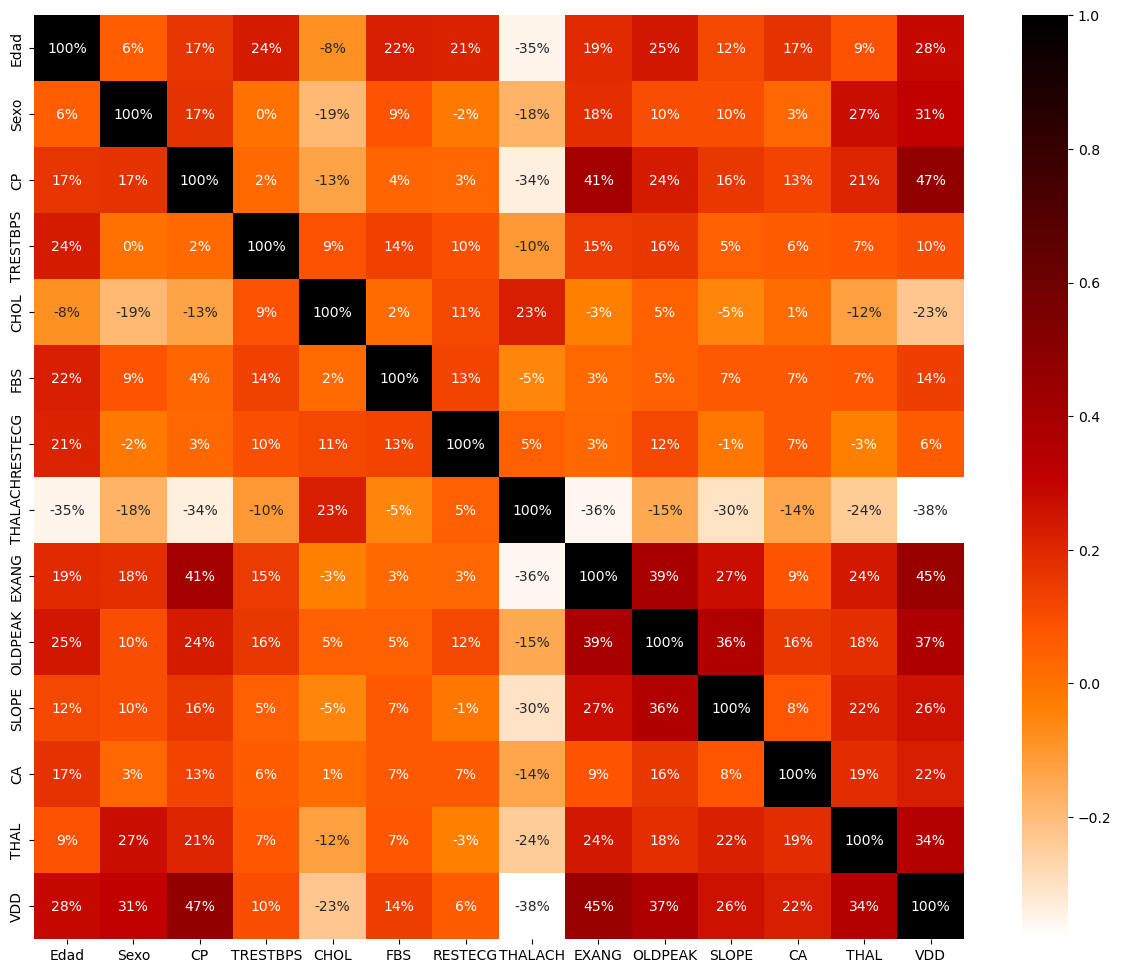

In [42]:
#Visualización de la correlación del datadet Cleveland a través de un Heatmap
plt.figure(figsize=(15,12))
axC = sns.heatmap(corrC,annot=True,fmt='.0%',cmap="gist_heat_r")

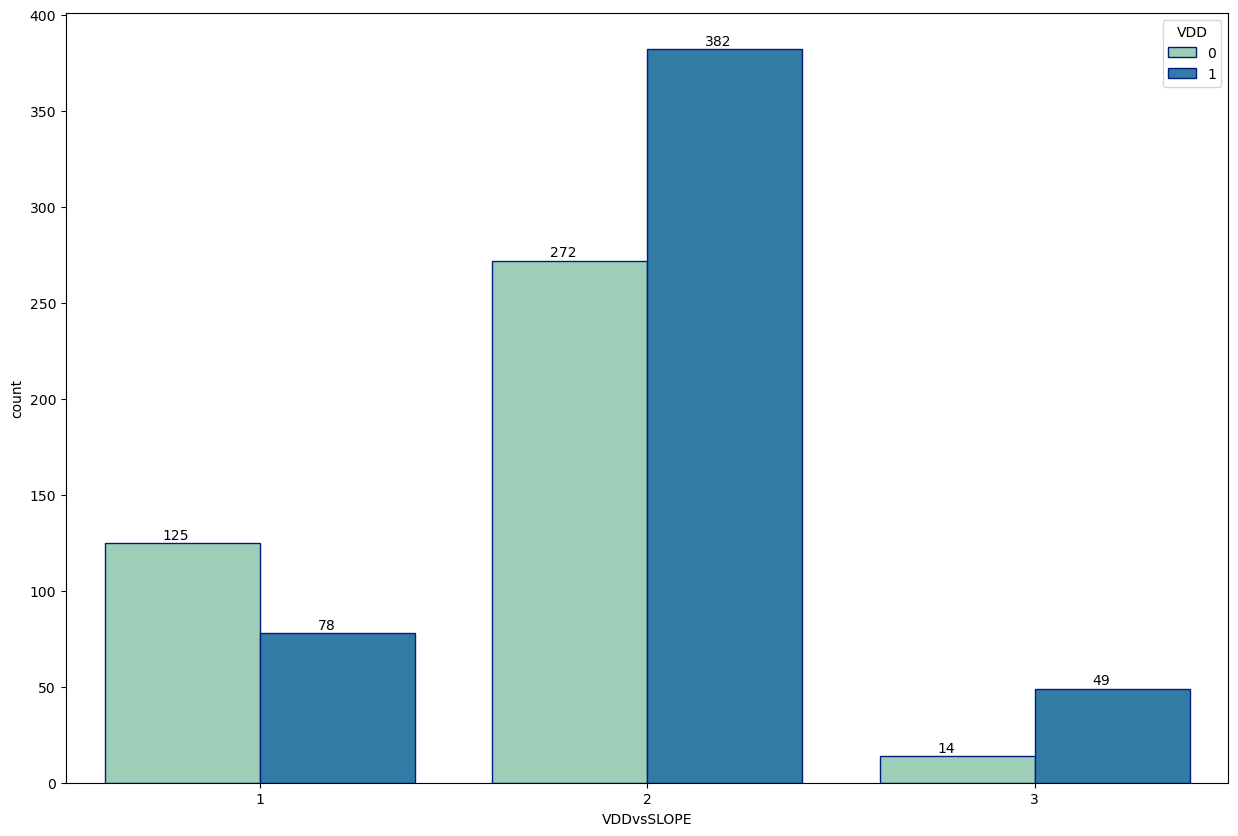

In [43]:
df['VDDvsSLOPE']= (df['SLOPE']).round(0)
df['VDDvsSLOPE']= pd.to_numeric(df['VDDvsSLOPE'],downcast='integer')
plt.figure(figsize=(15,10))
axS = sns.countplot(x='VDDvsSLOPE',hue='VDD',data=df,palette='YlGnBu',edgecolor=sns.color_palette('dark',n_colors=1))
for p in axS.patches:
        axS.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))

In [44]:
df=df.drop('VDDvsSLOPE',axis=1)

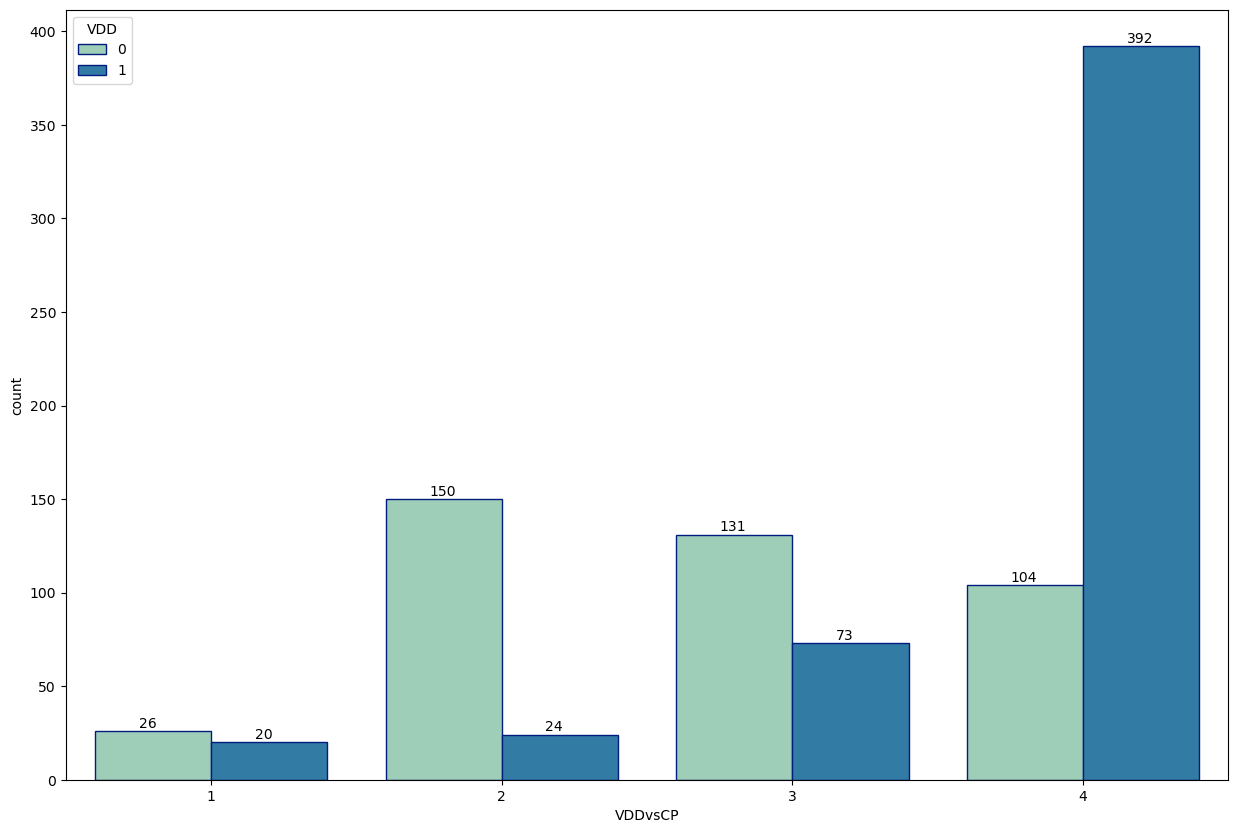

In [45]:
#Declaración de nueva columna llamada VDDvsCP, la cúal compara la cantidad de personas con
#o sin enfermedades cardiovasculares y el tipo del dolor de pecho que sufre.
df['VDDvsCP']= (df['CP'])
df['VDDvsCP']= pd.to_numeric(df['VDDvsCP'],downcast='integer')
plt.figure(figsize=(15,10))
axCP = sns.countplot(x='VDDvsCP',hue='VDD',data=df,palette='YlGnBu',edgecolor=sns.color_palette('dark',n_colors=1))
for p in axCP.patches:
        axCP.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))

In [46]:
df=df.drop('VDDvsCP',axis=1)

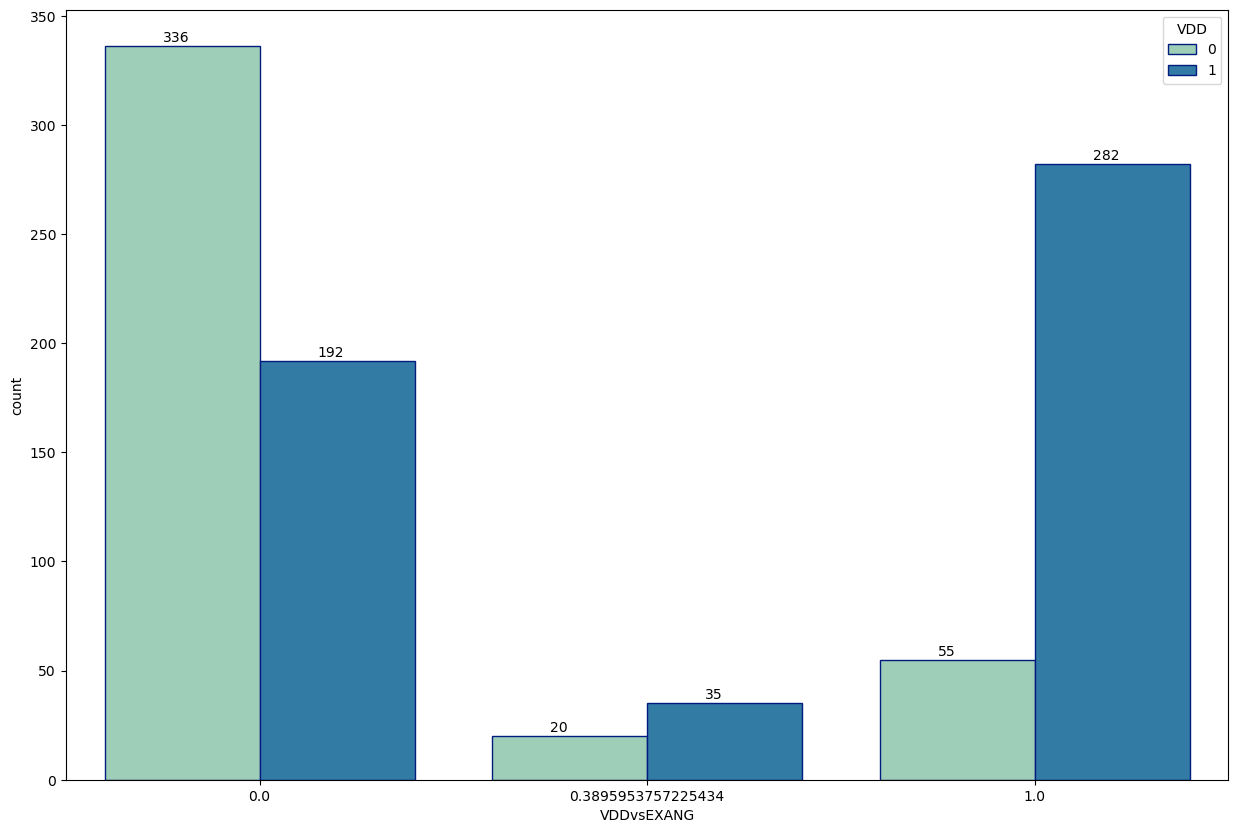

In [47]:
#Declaración de nueva columna llamada VDDvsEXANG, la cúal compara la cantidad de personas con
#o sin enfermedades cardiovasculares y si es que el ejercicio le induce una angina o no.
df['VDDvsEXANG']= (df['EXANG'])
df['VDDvsEXANG']= pd.to_numeric(df['VDDvsEXANG'],downcast='integer')
plt.figure(figsize=(15,10))
axE = sns.countplot(x='VDDvsEXANG',hue='VDD',data=df,palette='YlGnBu',edgecolor=sns.color_palette('dark',n_colors=1))
for p in axE.patches:
        axE.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))

In [48]:
df=df.drop('VDDvsEXANG',axis=1)

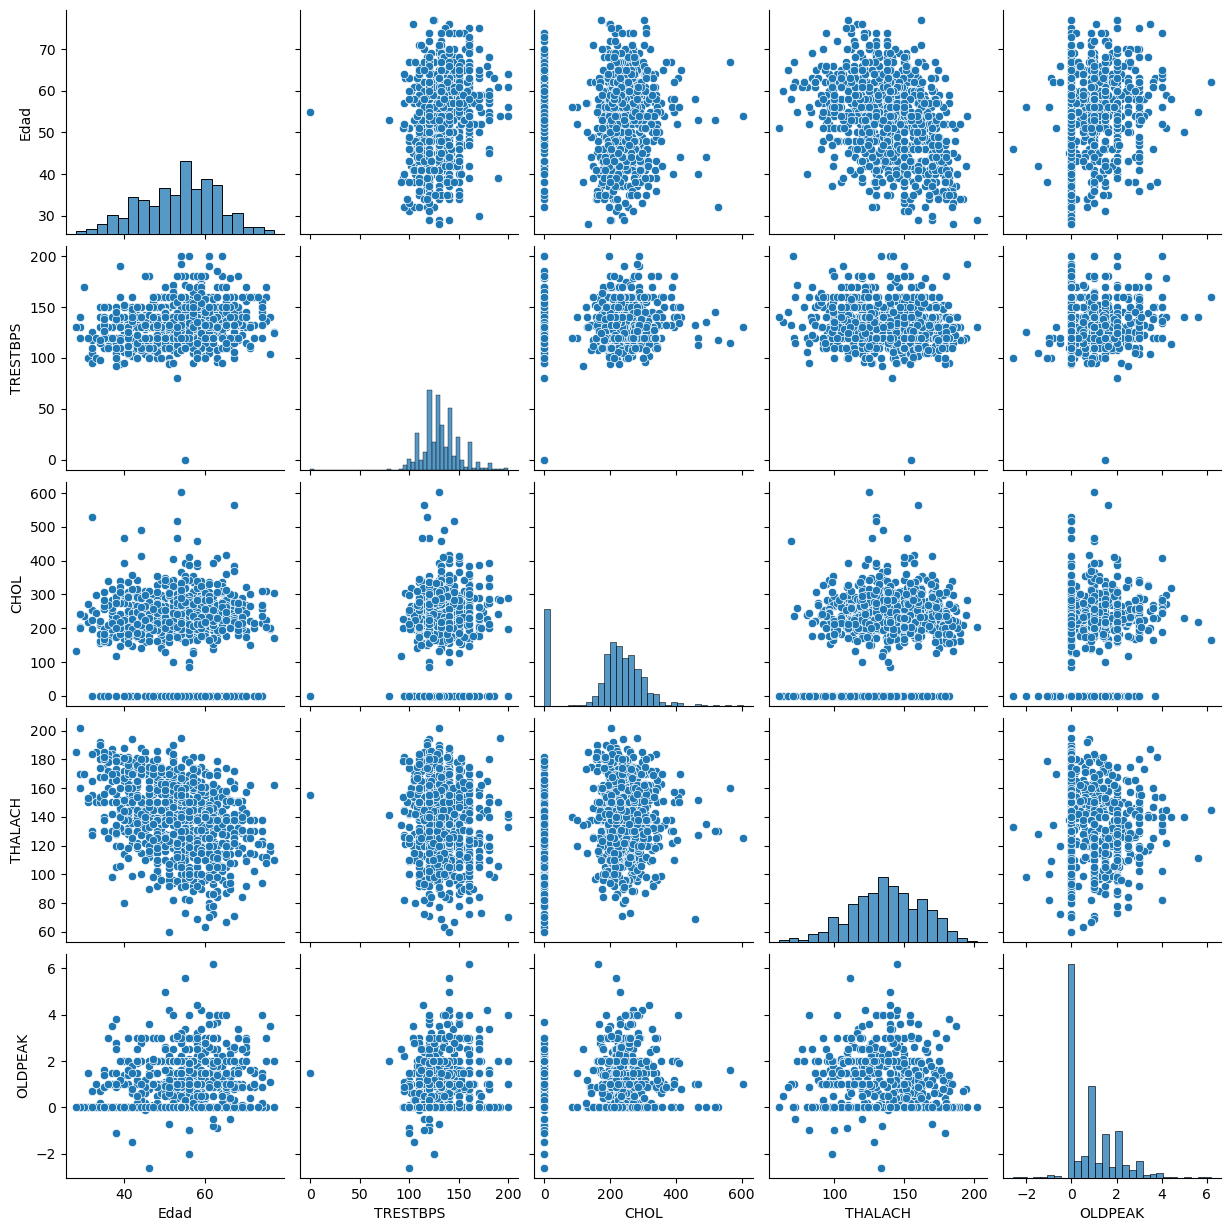

In [49]:
subdataC = df[['Edad','TRESTBPS','CHOL','THALACH','OLDPEAK']]
sns.pairplot(subdataC)

In [51]:
positivos_df = df[df['VDD']==1]
positivos_df.describe()

,Edad,Sexo,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,VDD
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.0
mean,55.903733,0.901768,3.644401,133.837257,176.969418,0.209501,0.650706,128.899997,0.580817,1.231690,1.890807,0.824514,5.491041,1.0
std,8.718959,0.297921,0.748537,19.753727,126.172531,0.381048,0.802569,23.300793,0.477036,1.152837,0.500042,0.570730,1.224968,0.0
min,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,1.0
25%,51.000000,1.000000,4.000000,120.000000,0.000000,0.000000,0.000000,113.000000,0.000000,0.000000,1.770867,0.703226,5.087558,1.0
50%,57.000000,1.000000,4.000000,132.132404,217.000000,0.000000,0.000000,130.000000,1.000000,1.000000,2.000000,0.703226,5.087558,1.0
75%,62.000000,1.000000,4.000000,145.000000,267.000000,0.166265,1.000000,144.000000,1.000000,2.000000,2.000000,0.703226,7.000000,1.0
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.0


In [52]:
negativos_df = df[df['VDD']==0]
negativos_df.describe()

,Edad,Sexo,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,VDD
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.0
mean,50.547445,0.649635,2.761557,130.021042,226.575368,0.112719,0.547445,148.252830,0.152778,0.441739,1.622329,0.553018,4.587866,0.0
std,9.433700,0.477666,0.903425,16.460208,74.301504,0.309070,0.805204,23.152969,0.343733,0.704425,0.469846,0.617752,1.256114,0.0
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-1.100000,1.000000,0.000000,3.000000,0.0
25%,43.000000,0.000000,2.000000,120.000000,199.130337,0.000000,0.000000,135.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
50%,51.000000,1.000000,3.000000,130.000000,225.000000,0.000000,0.000000,150.000000,0.000000,0.000000,1.770867,0.703226,5.087558,0.0
75%,57.000000,1.000000,4.000000,140.000000,266.000000,0.000000,1.000000,165.000000,0.000000,0.878788,1.770867,0.703226,5.087558,0.0
max,76.000000,1.000000,4.000000,190.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,9.000000,7.000000,0.0


In [53]:
print("Pacientes positivos (depresionST):" + str(positivos_df['OLDPEAK'].mean()))
print("Pacientes negativos (depresionST):" + str(negativos_df['OLDPEAK'].mean()))

Pacientes positivos (depresionST):1.231690182770733
Pacientes negativos (depresionST):0.4417385534173855


In [54]:
print("Pacientes positivos (Dolor de pecho):" + str(positivos_df['CP'].mean()))
print("Pacientes negativos (Dolor de pecho):" + str(negativos_df['CP'].mean()))

Pacientes positivos (Dolor de pecho):3.644400785854617
Pacientes negativos (Dolor de pecho):2.761557177615572


In [55]:
print("Pacientes positivos (SLOPE):" + str(positivos_df['SLOPE'].mean()))
print("Pacientes negativos (SLOPE):" + str(negativos_df['SLOPE'].mean()))

Pacientes positivos (SLOPE):1.8908067228511989
Pacientes negativos (SLOPE):1.6223294746357335


In [59]:
x = df.iloc[:,  :-1].values
y = df.iloc[:, -1].values

In [60]:
#Splitting, Training set & Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [61]:
np.set_printoptions(precision = 3, suppress = True)
print(x_test[0:10])

[[ 67.      1.      4.    160.    286.      0.      2.    108.      1.
    1.5     2.      3.      3.   ]
 [ 63.      1.      2.    132.132 165.      0.      1.    137.546   0.39
    0.879   1.771   0.703   5.088]
 [ 47.      0.      2.    140.    257.      0.      0.    135.      0.
    1.      1.      0.703   5.088]
 [ 65.      1.      4.    150.    236.      1.      1.    105.      1.
    0.      1.771   0.703   5.088]
 [ 65.      0.      4.    150.    225.      0.      2.    114.      0.
    1.      2.      3.      7.   ]
 [ 32.      1.      1.     95.      0.      0.166   0.    127.      0.
    0.7     1.      0.703   5.088]
 [ 54.      1.      2.    160.    305.      0.      0.    175.      0.
    0.      1.771   0.703   5.088]
 [ 71.      1.      3.    132.132 221.      0.      0.    137.546   0.39
    0.879   1.771   0.703   5.088]
 [ 56.      0.      2.    140.    294.      0.      2.    153.      0.
    1.3     2.      0.      3.   ]
 [ 57.      1.      4.    110.    197.    

In [63]:
print(y_train[0:10])

[0 1 1 0 1 1 0 1 1 0]


In [64]:
print(y_test[0:10])

[1 0 0 1 1 1 0 1 0 0]


In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, :] = sc.fit_transform(x_train[:, :])
x_test[:, :] = sc.fit_transform(x_test[:, :])

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [70]:
from sklearn.naive_bayes import GaussianNB
clasificadorGNB = GaussianNB()
clasificadorGNB.fit(x_train, y_train)

GaussianNB()

In [71]:
y_GNB = clasificadorGNB.predict(x_test)
print(np.concatenate((y_GNB.reshape(len(y_GNB),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_GNB))
accuracy_score(y_test, y_GNB)

[[72 17]
 [11 84]]


0.8478260869565217

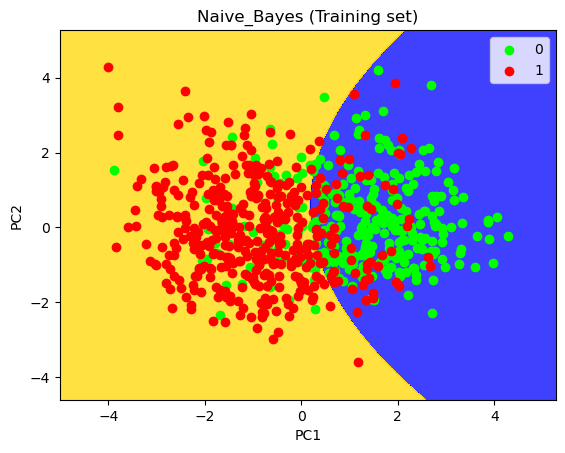

In [73]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificadorGNB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'gold')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color = ListedColormap(('lime', 'red'))(i), label = j)
plt.title('Naive_Bayes (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

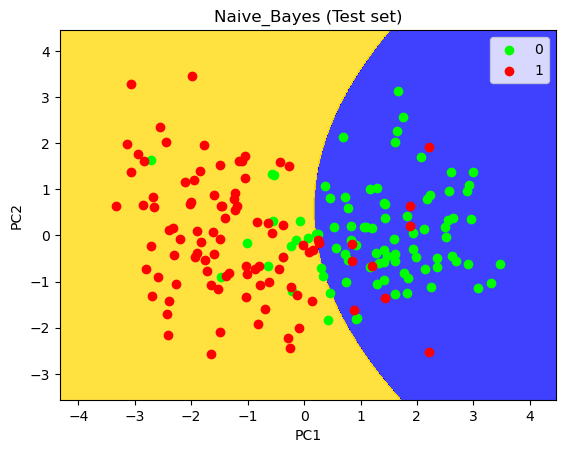

In [74]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificadorGNB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'gold')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color = ListedColormap(('lime', 'red'))(i), label = j)
plt.title('Naive_Bayes (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

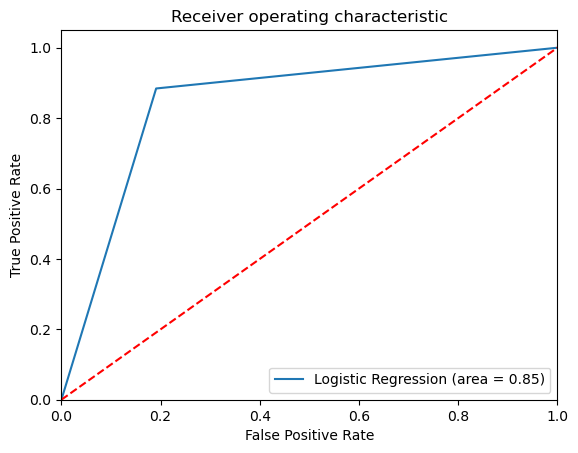

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,y_GNB)
fpr, tpr, thresholds = roc_curve(y_test,y_GNB)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [76]:
import pickle
filename = 'modelo_GNB'
pickle.dump(GaussianNB,open(filename,'wb'))